[[   5.    7.    7. ...,   13.   20.   31.]
 [  65.   74.   74. ...,  111.  106.   96.]
 [ 101.  116.  130. ...,   61.   52.   41.]
 ..., 
 [ 107.  115.  108. ...,   26.   23.   24.]
 [ 255.  255.  255. ...,   22.   22.   22.]
 [ 174.  178.  202. ...,   28.   26.   28.]]


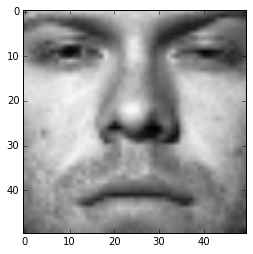

(100, 2500) (100,)


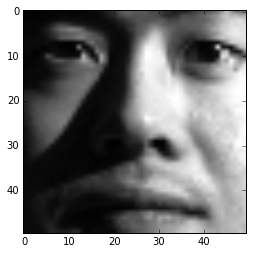

In [1]:
#Applied Machine Learning_Homework2_Question1

import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
from sklearn import svm, cross_validation, datasets
from sklearn.svm import SVC

%matplotlib inline

#1.(b) load, reshape and display image

#loading the training and testing data
train_labels, train_data, test_labels, test_data = [], [], [], []
trainingPath = './faces/train.txt'
testingPath = './faces/test.txt'

#reshaping the sets and creating numpy array of data and label
for line in open(trainingPath):
    imTrain = misc.imread(line.strip().split()[0])
    train_data.append(imTrain.reshape(2500,))
    train_labels.append(line.strip().split()[1])

for line in open(testingPath):
    imTest = misc.imread(line.strip().split()[0])
    test_data.append(imTest.reshape(2500,))
    test_labels.append(line.strip().split()[1])
train_data, train_labels, test_data, test_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int), np.array(test_data, dtype=float), np.array(test_labels, dtype=int) 

#display sample train image
print train_data.shape, train_labels.shape
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.savefig ("sample_training_image.png")
plt.show()
plt.close()

#display sample test image
print test_data.shape, test_labels.shape
plt.imshow(test_data[11, :].reshape(50,50), cmap = cm.Greys_r)
plt.savefig ("sample_testing_image.png")
plt.show()
plt.close()



(2500,)


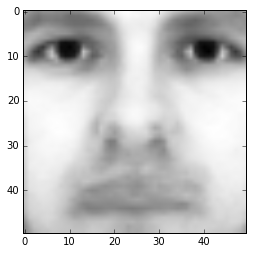

In [3]:
#1.(c) computing average face

averageTrain = np.mean(train_data, axis = 0)
print averageTrain.shape
plt.imshow(averageTrain.reshape(50,50), cmap = cm.Greys_r)
plt.savefig ("average_face.png")
plt.show()
plt.close()

(540, 2500)


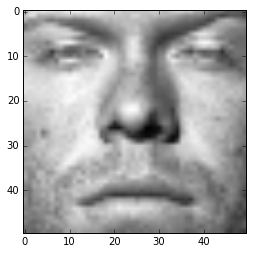

(100, 2500)


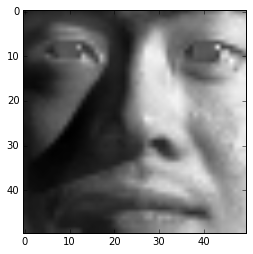

In [4]:
#1.(d) average face subtraction

#creating numpy array for mean subtracted face
subtractedTrain, subtractedTest = [], []
for line in train_data:
    subtractedTrain.append(line - averageTrain)

for line in test_data:
    subtractedTest.append(line - averageTrain)

subtractedTrain, subtractedTest = np.array(subtractedTrain, dtype=float), np.array(subtractedTest, dtype=float)

#display sample mean subtracted face of training set
print subtractedTrain.shape
plt.imshow(subtractedTrain[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.savefig ("train_subtracted_face.png")
plt.show()
plt.close()

#display sample mean subtracted face of testing set
print subtractedTest.shape
plt.imshow(subtractedTest[11, :].reshape(50,50), cmap = cm.Greys_r)
plt.savefig ("test_subtracted_face.png")
plt.show()
plt.close()

In [2]:
#1. (e) SVD

U, S, V = np.linalg.svd(subtractedTrain, full_matrices = False)

print V.shape
for x in range (0,10):
    plt.imshow(V[x, :].reshape(50,50), cmap = cm.Greys_r)
    plt.savefig ("eigenface(%d).png" %x)
    plt.show()
    plt.close()

NameError: name 'np' is not defined

In [1]:
#1. (f) Low Rank Approximation error

#finding Xr
XrArray = []
rArray = []

S = np.diag(S)
for r in range (1,201):
    rArray.append(r+1)
    Xr = np.dot(U[:, :r], S[:r, :r])
    Xr = np.dot(Xr, V[:r, :])
    XrArray.append(np.linalg.norm(subtractedTrain-Xr))

plt.plot ( rArray , XrArray) #plotting graph
plt.suptitle('Rank-r Approximation Error', fontsize=20)
plt.xlabel('r', fontsize=16)
plt.ylabel('Approximation Error', fontsize=16)
plt.savefig ("rank-r_approximation_error.png")
plt.show()
plt.close()

NameError: name 'S' is not defined

In [8]:
#1. (g) Function to generate Eigenface Features

r = 0
def generateFeature(r, subtractedTrain, subtractedTest, V1):
    Ftrain = np.dot(subtractedTrain, V1[: r,:].T) 
    Ftest = np.dot(subtractedTest, V1[: r,:].T)
    
    return Ftrain, Ftest

0.79


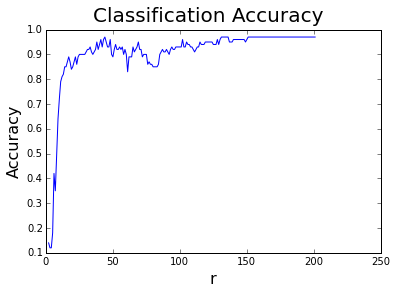

In [16]:

#1. (h) Face Recognition
#Ut, St, Vt = np.linalg.svd(subtractedTest, full_matrices = False)
accuracyArray = []

r = 10
Ftrain, Ftest = generateFeature(r, subtractedTrain, subtractedTest, V)
model.fit(Ftrain,train_labels)
predicted = model.predict(Ftest)
print np.sum(predicted == test_labels) / float(len(test_labels))  

model = LogisticRegression()
for r in range (1,201):
    Ftrain, Ftest = generateFeature(r, subtractedTrain, subtractedTest, V)
    model.fit(Ftrain,train_labels)
    predicted = model.predict(Ftest)
    accuracy = np.sum(predicted == test_labels) / float(len(test_labels))
    accuracyArray.append(accuracy)

plt.plot ( rArray , accuracyArray) #plotting graph
plt.suptitle('Classification Accuracy', fontsize=20)
plt.xlabel('r', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.savefig ("classification_accuracy.png") 
plt.show()
plt.close()

In [ ]:
#Applied Machine Learning_Homework2_Question1

import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

#1.(b) load, reshape and display image

#loading the training and testing data
train_labels, train_data, test_labels, test_data = [], [], [], []
trainingPath = './faces/train.txt'
testingPath = './faces/test.txt'

#reshaping the sets and creating numpy array of data and label
for line in open(trainingPath):
    imTrain = misc.imread(line.strip().split()[0])
    train_data.append(imTrain.reshape(2500,))
    train_labels.append(line.strip().split()[1])

for line in open(testingPath):
    imTest = misc.imread(line.strip().split()[0])
    test_data.append(imTest.reshape(2500,))
    test_labels.append(line.strip().split()[1])
train_data, train_labels, test_data, test_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int), np.array(test_data, dtype=float), np.array(test_labels, dtype=int) 

#display sample train image
print train_data.shape, train_labels.shape
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.savefig ("sample_training_image.png")

#display sample test image
print test_data.shape, test_labels.shape
plt.imshow(test_data[11, :].reshape(50,50), cmap = cm.Greys_r)
plt.savefig ("sample_testing_image.png")
######################################################################################################################

#1.(c) computing average face

averageTrain = np.mean(train_data, axis = 0)
print averageTrain.shape
plt.imshow(averageTrain.reshape(50,50), cmap = cm.Greys_r)
plt.savefig ("average_face.png")
######################################################################################################################

#1.(d) average face subtraction

#creating numpy array for mean subtracted face
subtractedTrain, subtractedTest = [], []
for line in train_data:
    subtractedTrain.append(line - averageTrain)

for line in test_data:
    subtractedTest.append(line - averageTrain)

subtractedTrain, subtractedTest = np.array(subtractedTrain, dtype=float), np.array(subtractedTest, dtype=float)

#display sample mean subtracted face of training set
print subtractedTrain.shape
plt.imshow(subtractedTrain[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.savefig ("train_subtracted_face.png")

#display sample mean subtracted face of testing set
print subtractedTest.shape
plt.imshow(subtractedTest[11, :].reshape(50,50), cmap = cm.Greys_r)
plt.savefig ("test_subtracted_face.png")
######################################################################################################################

#1. (e) SVD

U, S, V = np.linalg.svd(subtractedTrain, full_matrices = False)
S = np.diag(S)
for x in range (0,10):
    plt.imshow(V[x, :].reshape(50,50), cmap = cm.Greys_r)
    plt.savefig ("eigenface(%d).png" %x)
    
#1. (f) Low Rank Approximation error

#finding Xr
XrArray = []
rArray = []
for r in range (0,200):
    rArray.append(r+1)
    Xr = np.dot(U[:, :r], S[:r, :r])
    Xr = np.dot(Xr, V[:r, :])
    XrArray.append(np.linalg.norm(subtractedTrain-Xr))

plt.plot ( rArray , XrArray) #plotting graph
plt.suptitle('Rank-r Approximation Error', fontsize=20)
plt.xlabel('r', fontsize=16)
plt.ylabel('Approximation Error', fontsize=16)
plt.savefig ("rank-r_approximation_error.png") #saving graph as .png file


